# [Project]_유가_데이터를_활용한_주유소_시장분석

---

## 프로젝트 목표
- <한국석유공사 제품별 주유소 판매가격> 데이터의 가격/지역/브랜드/셀프여부를 분석하여 주유소 시장 관련 인사이트 도출
- 실제 연구/실무에서 활용되는 필수 분석 과정 및 기법에 대해 학습

---

## 프로젝트 목차
1. **데이터 Cleansing 및 Feature Engineering:** 분석을 위한 사전 점검 및 데이터 개괄 이해 <br>
    1.1. 2018년 데이터 기준 데이터 Cleansing 및 Feature Engineering<br>
    1.2. Cleansing 및 Feature Engineering 함수 생성 및 전체 년도 데이터 적용 <br>
    1.3. 연도별 데이터 Outer Join<br>
<br> 

2. **주유소 개폐업 현황 분석:** 연도별 주유소 ID 비교를 통한 개폐업 현황 분석<br>
    2.1. 연도별 개폐업 수치 분석<br>
<br>

3. **브랜드 분석:** 브랜드별 가격경쟁력 및 시장점유율 분석<br>
    3.1. 주요 브랜드별 가격 Line Plot 분석<br>
    3.2. 주요 브랜드별 지난 4년간 시장 점유율 Stacked Bar Plot 및 Heatmap 분석<br>
<br>

4. **가격 분석:** 주유소 및 지역 별 가격 편차 분석<br>
    4.1. 가격 분포 Boxplot<br>
    4.2. 지역별 가격 분포 Boxplot (Multiple Columns)<br>
<br>


---

## 데이터 출처
-  https://www.data.go.kr/data/15044628/fileData.do
- Opinet 유가내려받기: 2018 ~ 2021년 4개년에 대해 각각 6월 1일~7일 데이터 추출
- 프로젝트에 필요한 컬럼만 추출

---

## 프로젝트 개요

행정안전부 공공데이터 포털에 등재되어있는 `한국석유공사 제품별 주유소 판매가격`은 전국 10000개 이상의 주유소에 대해 가격/지역/브랜드/셀프여부 등 방대한 데이터를 제공하고 있습니다. 이 데이터를 정유업체 전략기획팀 실무자의 입장에서 분석하여 주유소 시장에 대한 인사이트를 도출해봅시다. 

먼저, 주유소별로 7일치씩 쌓여있는 데이터를 요약하여 주유소별로 1개의 행이 되도록 각 년도 데이터를 가공 해봅시다. 그리고 이 데이터를 통해 지난 4년동안 몇개의 주유소가 개업 및 폐업 했는지 분석해 봅시다. 다음, 브랜드별 가격경쟁력 및 지난 4년간 시장 점유율 변화를 분석해 봅시다. 마지막으로 주유소별 가격 편차가 어느정도 되는지 알아보고, 지역별로도 유의미한 차이가 있는지 분석해 봅시다. 

## 1. 데이터 Cleansing 및 Feature Engineering

필요한 패키지를 `import`한 후 분석을 위한 사전 점검과 함께 데이터 개괄을 이해합니다.

### 1.1. 18년 데이터 기준 데이터 점검 및 Cleansing

In [31]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [32]:
font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)

plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus']=False

In [33]:
f18 = pd.read_csv('./data/과거_판매가격(주유소)_2018.csv')

In [34]:
f18.head()

,번호,기간,지역,상표,셀프여부,휘발유
0,기준 : 일간(20180601~20180607),NaN,NaN,NaN,NaN,NaN
1,A0011536,20180601.0,강원 강릉시,SK에너지,셀프,1579.0
2,A0011536,20180602.0,강원 강릉시,SK에너지,셀프,1579.0
3,A0011536,20180603.0,강원 강릉시,SK에너지,셀프,1579.0
4,A0011536,20180604.0,강원 강릉시,SK에너지,셀프,1579.0


**(1) 데이터 안에 NA(결측값)이 있는지 확인해봅시다.**

**(2) 결측값으로 주로 구성된 0번째 행을 제거하겠습니다.**

In [35]:
f18 = f18.drop(0) 

**(2.1) reset_index를 이용해서 인덱스를 초기화하겠습니다.**

In [36]:
f18=f18.reset_index(drop=True)

**(3) 데이터 안에 NA(결측값)이 있는지 확인해봅시다.**

**(4) 데이터 변수별 평균, 분산, 중복값을 제외한 데이터의 수 등을 살펴봅니다.**

In [37]:
# include='all': 카테고리형 변수도 정보 제공
f18.describe(include='all') 

,번호,기간,지역,상표,셀프여부,휘발유
count,81466,8.146600e+04,81466,81466,81466,81466.000000
unique,11673,NaN,229,9,2,NaN
top,A0024620,NaN,충북 청주시,SK에너지,일반,NaN
freq,7,NaN,1574,24531,49850,NaN
mean,NaN,2.018060e+07,NaN,NaN,NaN,1603.579714
std,NaN,2.000113e+00,NaN,NaN,NaN,112.806463
min,NaN,2.018060e+07,NaN,NaN,NaN,0.000000
25%,NaN,2.018060e+07,NaN,NaN,NaN,1579.000000
50%,NaN,2.018060e+07,NaN,NaN,NaN,1598.000000
75%,NaN,2.018061e+07,NaN,NaN,NaN,1625.000000


#### describe 점검 포인트:
- unique 번호가 11673개이며 최대 7번까지 기록되었음
- 기간이 수치로 인식되고 있음
- unique 지역 개수가 229이어서 너무 많음
- unique 상표 개수가 9개이므로 적절함
- unique 셀프여부 개수가 2개이며, 셀프여부는 각각 절반정도 비중을 차지함
- 휘발유 min이 0임

**(5) '기간' 변수가 현재 소수점 형태인 것을 알 수 있습니다. 이 변수를 datetime 형태로 바꾸겠습니다.**

**(5.1) 이때 lambda 함수를 이용해서 datetime 형태로 바꾸겠습니다.**

**(5.2) lambda 함수는 무엇일까요?**

In [12]:
#Lambda 함수를 배워봅시다.

school = {'classes' : ['A','B','C','A','B','D'], \

    'students' :['홍','김','이','박','김','표'], \
    
    '취미' : ['피아노','노래','태권도','영화감상','컴퓨터','게임']}

school = pd.DataFrame(school)

In [13]:
#Lambda 함수를 배워봅시다.

school

,classes,students,취미
0,A,홍,피아노
1,B,김,노래
2,C,이,태권도
3,A,박,영화감상
4,B,김,컴퓨터
5,D,표,게임


In [14]:
#Lambda 함수를 배워봅시다.

school['classes'].apply(lambda x: '1_' + x)

0    1_A
1    1_B
2    1_C
3    1_A
4    1_B
5    1_D
Name: classes, dtype: object

**(5.3) 이제 lambda 함수를 이용해서 datetime 형태로 바꾸겠습니다.**

In [38]:
f18['기간'] = f18['기간'].apply(lambda x:pd.to_datetime(str(int(x))))

**(6) 지역 변수가 '**도 00시' 형태로 있는 것을 알 수 있습니다. 이를 '지역1'과 '지역2'로 구분해보겠습니다.**

**(6.1) '지역1'에는 '**도' 데이터, '지역2'는 '00시' 데이터입니다.**

In [16]:
f18['지역2']=f18['지역'].apply(lambda x:x.split()[1])

IndexError: list index out of range

**(6.2) 이때 IndexError라는 에러가 뜨는 것을 알 수 있습니다. for문과 try except문을 통해 어디에서 에러가 뜨는지 찾아보겠습니다.**

In [39]:
for i in range(len(f18)):
    try:
        f18.loc[i,'지역'].split()[1]
    except IndexError:
        print(f18.loc[i,'지역'])

세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시
세종시


**(6.3) 세종시에서 에러가 뜨는 것을 알 수 있습니다. 이 경우, **도가 없기 때문에 기타로 지정하겠습니다.**

In [40]:
for i in range(len(f18)):
    if f18.loc[i,'지역']=='세종시':
        f18.loc[i,'지역']='기타 세종시'

**(6.4) 다시 '지역'을 도와 시로 나누어서 '지역1'과 '지역2'로 구분해보겠습니다.**

In [41]:
f18['지역1']=f18['지역'].apply(lambda x: x.split()[0])
f18['지역2']=f18['지역'].apply(lambda x: x.split()[1])

**(6.5) '지역' 변수를 제거하도록 하겠습니다.**

**(7) 휘발유값을 향후에 시각화하기 위해서, 휘발유값이 0인 행이 있는지 확인해보겠습니다.**

**(7.1) 휘발유값이 0인 행을 제거하겠습니다.**

In [42]:
f18=f18[f18['휘발유']!=0]

**(8) 주유소 고유번호별 지역, 상표, 셀프여부데이터의 고유성(중복 유무)을 확인해보도록 하겠습니다.**

In [43]:
unique_count=f18.groupby('번호')[['지역1','지역2','상표','셀프여부']].nunique() #만약 고유번호별로 지역1이 중복되는 값이 2개이면 지역1은 2이다.

**(8.1) 주유소 고유번호는 같지만 지역, 상표, 셀프여부가 다른 데이터를 찾아봅시다.**

In [44]:
target = unique_count.loc[unique_count.sum(axis=1)!=4]
target

,지역1,지역2,상표,셀프여부
번호,,,,
A0012639,1,1,2,1
A0016076,1,1,2,1


In [45]:
f18.loc[f18['번호'].isin(target.index)]

,번호,기간,지역,상표,셀프여부,휘발유,지역1,지역2
73032,A0016076,2018-06-01,충남 아산시,현대오일뱅크,일반,1565.0,충남,아산시
73033,A0016076,2018-06-02,충남 아산시,현대오일뱅크,일반,1565.0,충남,아산시
73038,A0016076,2018-06-07,충남 아산시,자가상표,일반,1595.0,충남,아산시
77334,A0012639,2018-06-01,충북 옥천군,현대오일뱅크,일반,1619.0,충북,옥천군
77335,A0012639,2018-06-02,충북 옥천군,현대오일뱅크,일반,1619.0,충북,옥천군
77336,A0012639,2018-06-03,충북 옥천군,현대오일뱅크,일반,1619.0,충북,옥천군
77337,A0012639,2018-06-04,충북 옥천군,현대오일뱅크,일반,1619.0,충북,옥천군
77338,A0012639,2018-06-05,충북 옥천군,현대오일뱅크,일반,1619.0,충북,옥천군
77339,A0012639,2018-06-06,충북 옥천군,현대오일뱅크,일반,1619.0,충북,옥천군
77340,A0012639,2018-06-07,충북 옥천군,S-OIL,일반,1619.0,충북,옥천군


**(8.2) isin() 함수를 이용해 해당 주유소를 삭제하도록 하겠습니다.**

In [46]:
f18 = f18.loc[~f18['번호'].isin(target.index)]

**(8.3) reset_index를 이용해서 인덱싱을 초기화하겠습니다.**

In [47]:
f18=f18.reset_index(drop=True)

**(9) 현재 데이터는 주유소의 날짜별 휘발유 가격이 표기되어 있습니다. 이번에는 주유소별 휘발유 가격의 평균을 구해봅니다.**

In [48]:
f18 = f18.groupby('번호').agg({'지역1':'first','지역2':'first','상표':'first','셀프여부':'first','휘발유':'mean'})

In [49]:
f18

,지역1,지역2,상표,셀프여부,휘발유
번호,,,,,
A0000004,경기,광명시,GS칼텍스,일반,1599.000000
A0000011,서울,양천구,GS칼텍스,일반,1594.000000
A0000012,경기,용인시,GS칼텍스,일반,1594.000000
A0000014,강원,인제군,GS칼텍스,일반,1609.000000
A0000015,서울,송파구,현대오일뱅크,셀프,1589.000000
...,...,...,...,...,...
A0033277,경기,화성시,알뜰(ex),셀프,1617.571429
A0033278,경기,오산시,현대오일뱅크,셀프,1576.000000
A0033279,전남,나주시,S-OIL,셀프,1559.000000


**(10) '번호'가 컬럼이 아닌 인덱스 형태로 있는 것을 알 수 있습니다. 따라서 '번호' 컬럼을 새로 만들고 인덱싱을 재설정하겠습니다.** 

In [50]:
f18['번호']=f18.index
f18=f18.reset_index(drop=True)

### 1.2. Cleansing 및 Feature Engineering 함수 생성 및 전체 년도 데이터 적용

In [51]:
def preprocess(df):
    
    df_copy=df.copy() # 필터링 전
    
    df = df.dropna(axis=0) 
    df = df.reset_index(drop=True)

    df['기간'] = df['기간'].apply(lambda x:pd.to_datetime(str(int(x))))

    for i in range(len(df)):
        if df.loc[i,'지역']=='세종시':
            df.loc[i,'지역']='기타 세종시'

    df['지역1']=df['지역'].apply(lambda x: x.split()[0])
    df['지역2']=df['지역'].apply(lambda x: x.split()[1])

    df = df.loc[df['휘발유']!=0,:]
    
    df = df.reset_index(drop=True)
    
    unique_count=df.groupby('번호')[['지역1','지역2','상표','셀프여부']].nunique()

    target = unique_count.loc[unique_count.sum(axis=1)!=4]

    df = df.loc[~df['번호'].isin(target.index)]

    df=df.reset_index(drop=True)
    
    df = df.groupby('번호').agg({'지역1':'first','지역2':'first','상표':'first','셀프여부':'first','휘발유':'mean'})

    df['번호']=df.index
    
    df=df.reset_index(drop=True)
    
    out = set(df_copy['번호']).difference(set(df['번호'])) # 필터링 후 

    return(df,out)

In [112]:
f_dict = dict()
out_all = set() # 이상치 발견한 주유소 번호 저장
for year in range(2018,2022):
    df = pd.read_csv(f'./data/과거_판매가격(주유소)_{year}.csv')
    f_dict[year], out = preprocess(df) #딕셔너리 예시로 설명!!!!!!!!!!!!!!!!!!
    out_all.update(out)

### 1.3. 연도별 데이터 Outer Join(연도별 데이터를 주유소 번호를 기준으로 합치기)

**(1) 2018~2021년도의 데이터를 합치기 위해서 merge라는 함수를 이용합니다.**

In [113]:
key = list(f_dict[2018].columns)
key.remove('휘발유')
print(key)

['지역1', '지역2', '상표', '셀프여부', '번호']


**(1.1) 코드 설명: m1의 경우, 2018년도 데이터와 2019년도 데이터를 key(지역1,지역2,상표,셀프여부)를 기준으로 정렬하는 것입니다.
how='outer'의 경우, key를 기준으로 모든 2018,2019년도 데이터가 나타나게 합니다. suffixes는 데이터를 합칠때, 2018년도 데이터인지, 2019년도 데이터인지 명시하는 코드입니다. 이제 함께 실행해봅시다.**

In [114]:
m1 = pd.merge(f_dict[2018],f_dict[2019],on=key,how='outer',suffixes=('_2018', '_2019'))
m2 = pd.merge(f_dict[2020],f_dict[2021],on=key,how='outer',suffixes=('_2020', '_2021'))
m = pd.merge(m1,m2,on=key,how='outer')

In [115]:
m

,지역1,지역2,상표,셀프여부,휘발유_2018,번호,휘발유_2019,휘발유_2020,휘발유_2021
0,경기,광명시,GS칼텍스,일반,1599.0,A0000004,1529.000000,1289.714286,1545.857143
1,서울,양천구,GS칼텍스,일반,1594.0,A0000011,1524.000000,1283.571429,1542.428571
2,경기,용인시,GS칼텍스,일반,1594.0,A0000012,1529.000000,1287.285714,1552.142857
3,강원,인제군,GS칼텍스,일반,1609.0,A0000014,1549.000000,1314.000000,1575.000000
4,서울,송파구,현대오일뱅크,셀프,1589.0,A0000015,1512.428571,1289.285714,1575.714286
...,...,...,...,...,...,...,...,...,...
13537,경북,영천시,NH-OIL,일반,NaN,A0033545,NaN,NaN,1498.285714
13538,경남,김해시,현대오일뱅크,셀프,NaN,A0033546,NaN,NaN,1538.571429
13539,대구,달서구,S-OIL,셀프,NaN,A0033547,NaN,NaN,1519.000000
13540,전북,전주시,현대오일뱅크,셀프,NaN,A0033548,NaN,NaN,1509.000000


**(1.2) m1을 해석하자면, 휘발유_2018이 NaN인 주유소는 2018년도에는 존재하지 않은 주유소이며, 휘발유_2019가 NaN인 주유소는 2018년도에는 존재했으나, 2019년도에는 존재하지 않는 주유소임을 의미합니다.**

**(1.3) groupby 함수를 이용해 주유소의 고유 번호별로 개업, 폐업 유무를 확인해봅시다.**

In [116]:
m.groupby('번호').size().sort_values(ascending=False).head()

번호
A0019752    4
A0016166    3
A0018959    3
A0033031    3
A0011875    3
dtype: int64

**(1.4) 조건문을 이용해 특정 주유소의 년도별 상표에 따른 개업, 폐업 유무를 확인해봅시다.**

In [117]:
m[m['번호']=='A0011875'] #고유번호별로 지역1, 지역2, 상표의 변화를 알 수 있다.

,지역1,지역2,상표,셀프여부,휘발유_2018,번호,휘발유_2019,휘발유_2020,휘발유_2021
3817,경기,포천시,알뜰주유소,셀프,1589.0,A0011875,1515.0,NaN,NaN
12566,경기,포천시,자가상표,셀프,NaN,A0011875,NaN,1286.142857,NaN
13200,경기,포천시,SK에너지,셀프,NaN,A0011875,NaN,NaN,1549.0


**(1.5) groupby를 이용해 주로 상표(현대오일뱅크, GS칼텍스 등)를 바꾸며 개업, 폐업을 자주한 주유소의 개수를 확인해봅시다.**

In [118]:
(m.groupby('번호').size()>1).sum()

1338

**(2) 지역(광주 북구, 서울 중랑구 등)을 바꾸며 개업, 폐업을 자주한 주유소의 개수를 확인해봅시다.**

In [119]:
key.remove('상표')
key

['지역1', '지역2', '셀프여부', '번호']

In [120]:
m1 = pd.merge(f_dict[2018],f_dict[2019],on=key,how='outer',suffixes=('_2018', '_2019'))
m2 = pd.merge(f_dict[2020],f_dict[2021],on=key,how='outer',suffixes=('_2020', '_2021'))
m = pd.merge(m1,m2,on=key,how='outer')

In [121]:
m.head()

,지역1,지역2,상표_2018,셀프여부,휘발유_2018,번호,상표_2019,휘발유_2019,상표_2020,휘발유_2020,상표_2021,휘발유_2021
0,경기,광명시,GS칼텍스,일반,1599.0,A0000004,GS칼텍스,1529.000000,GS칼텍스,1289.714286,GS칼텍스,1545.857143
1,서울,양천구,GS칼텍스,일반,1594.0,A0000011,GS칼텍스,1524.000000,GS칼텍스,1283.571429,GS칼텍스,1542.428571
2,경기,용인시,GS칼텍스,일반,1594.0,A0000012,GS칼텍스,1529.000000,GS칼텍스,1287.285714,GS칼텍스,1552.142857
3,강원,인제군,GS칼텍스,일반,1609.0,A0000014,GS칼텍스,1549.000000,GS칼텍스,1314.000000,GS칼텍스,1575.000000
4,서울,송파구,현대오일뱅크,셀프,1589.0,A0000015,현대오일뱅크,1512.428571,현대오일뱅크,1289.285714,현대오일뱅크,1575.714286


**(2.1) groupby 함수를 이용해 주유소의 고유 번호별로 개업, 폐업 유무를 확인해봅시다.**

In [122]:
size = m.groupby('번호').size().sort_values(ascending=False)
size.head()

번호
A0033348    2
A0002532    2
A0007535    2
A0033180    2
A0023051    1
dtype: int64

**(2.2) groupby를 이용해 지역(광주 북구, 서울 중랑구 등)을 바꾸며 개업, 폐업을 자주한 주유소를 확인해봅시다.**

In [123]:
m[m['번호']=='A0033348'] #고유번호별로 지역1, 지역2의 변화를 알 수 있다.

,지역1,지역2,상표_2018,셀프여부,휘발유_2018,번호,상표_2019,휘발유_2019,상표_2020,휘발유_2020,상표_2021,휘발유_2021
11918,강원,강릉시,NaN,일반,NaN,A0033348,NH-OIL,1500.0,NaN,NaN,NaN,NaN
12011,강원,삼척시,NaN,일반,NaN,A0033348,NaN,NaN,NH-OIL,1250.0,NH-OIL,1540.0


In [124]:
target = size[size>1].index
m.loc[m['번호'].isin(target)].sort_values('번호')

,지역1,지역2,상표_2018,셀프여부,휘발유_2018,번호,상표_2019,휘발유_2019,상표_2020,휘발유_2020,상표_2021,휘발유_2021
763,경기,수원시,S-OIL,셀프,1601.571429,A0002532,S-OIL,1511.714286,NaN,NaN,NaN,NaN
11944,경기,용인시,NaN,셀프,NaN,A0002532,NaN,NaN,S-OIL,1278.285714,S-OIL,1515.857143
2331,경기,수원시,SK에너지,일반,1609.000000,A0007535,SK에너지,1524.000000,NaN,NaN,NaN,NaN
11951,경기,용인시,NaN,일반,NaN,A0007535,NaN,NaN,SK에너지,1304.000000,SK에너지,1534.428571
11551,경북,구미시,SK에너지,일반,1590.571429,A0033180,SK에너지,1511.142857,NaN,NaN,NaN,NaN
12008,경북,의성군,NaN,일반,NaN,A0033180,NaN,NaN,SK에너지,1225.428571,SK에너지,1526.428571
11918,강원,강릉시,NaN,일반,NaN,A0033348,NH-OIL,1500.000000,NaN,NaN,NaN,NaN
12011,강원,삼척시,NaN,일반,NaN,A0033348,NaN,NaN,NH-OIL,1250.000000,NH-OIL,1540.000000


**(2.3) isin을 이용해 지역(광주 북구, 서울 중랑구 등)을 바꾸며 개업, 폐업을 자주한 주유소를 제거합니다.**

In [125]:
m = m.loc[~m['번호'].isin(target)]

**(2.4) 특정 관측값들을 제거했기 때문에 인덱싱을 다시 합니다.**

In [126]:
m=m.reset_index(drop=True)

In [127]:
m.groupby('번호').size().sort_values(ascending=False).head()

번호
A0000004    1
A0023144    1
A0023125    1
A0023126    1
A0023127    1
dtype: int64

**(3) 앞에서 구한 out_all에는 이상치들이 있습니다. for문을 이용해서 이상치에 해당하는 주유소를 삭제하겠습니다.**

In [19]:
#m = m.loc[[x not in out_all for x in m['번호']]]

**(3.1) 위의 함수를 쉽게 나타내면 아래와 같습니다.**

In [128]:
len(m)

12159

In [129]:
tmp=[]
for i in range(len(m['번호'])):
    if m.loc[i,'번호'] not in out_all:
        tmp.append(i)
m.loc[tmp]

,지역1,지역2,상표_2018,셀프여부,휘발유_2018,번호,상표_2019,휘발유_2019,상표_2020,휘발유_2020,상표_2021,휘발유_2021
0,경기,광명시,GS칼텍스,일반,1599.0,A0000004,GS칼텍스,1529.000000,GS칼텍스,1289.714286,GS칼텍스,1545.857143
1,서울,양천구,GS칼텍스,일반,1594.0,A0000011,GS칼텍스,1524.000000,GS칼텍스,1283.571429,GS칼텍스,1542.428571
2,경기,용인시,GS칼텍스,일반,1594.0,A0000012,GS칼텍스,1529.000000,GS칼텍스,1287.285714,GS칼텍스,1552.142857
3,강원,인제군,GS칼텍스,일반,1609.0,A0000014,GS칼텍스,1549.000000,GS칼텍스,1314.000000,GS칼텍스,1575.000000
4,서울,송파구,현대오일뱅크,셀프,1589.0,A0000015,현대오일뱅크,1512.428571,현대오일뱅크,1289.285714,현대오일뱅크,1575.714286
...,...,...,...,...,...,...,...,...,...,...,...,...
12154,경북,영천시,NaN,일반,NaN,A0033545,NaN,NaN,NaN,NaN,NH-OIL,1498.285714
12155,경남,김해시,NaN,셀프,NaN,A0033546,NaN,NaN,NaN,NaN,현대오일뱅크,1538.571429
12156,대구,달서구,NaN,셀프,NaN,A0033547,NaN,NaN,NaN,NaN,S-OIL,1519.000000
12157,전북,전주시,NaN,셀프,NaN,A0033548,NaN,NaN,NaN,NaN,현대오일뱅크,1509.000000


---

## 2. 주유소 개폐업 현황 분석: 연도별 주유소 ID 비교를 통한 개폐업 현황 분석


### 2.1. 연도별 개폐업 수치 분석

**m이라는 데이터셋을 보시면 NaN이 여럿 보이는 것을 알 수 있습니다.
이는 개업을 아직 하지 않은 주유소이거나 폐업한 주유소임을 육안으로 확인할 수 있습니다.
저희의 이번 목표는 연도별 개업한 주유소의 수와 폐업한 주유소의 수의 추이를 그래프로 나타내는 것입니다.
이 목표에 달성하기 위해 몇 개의 과정을 거쳐야 됩니다.**

**(1) 각각의 연도에서 상표가 NaN가 아닌 주유소 번호를 찾아야 됩니다.**

**(1.1) 이를 위해 각 연도별로 상표가 NaN가 아닌 주유소 번호를 찾은 후, set을 이용해서 주유소 번호들을 저장하도록 하겠습니다.**

In [130]:
id_dict=dict()
for year in range(2018,2022):
    id_dict[year] = set(m[~m[f'상표_{year}'].isna()]['번호'])

In [131]:
id_dict #연도별로 개업중인 주유소의 고유 번호를 저장합니다.

{2018: {'A0024620',
  'A0031095',
  'A0031066',
  'A0020561',
  'A0020277',
  'A0022172',
  'A0018488',
  'A0009267',
  'A0029674',
  'A0002019',
  'A0009943',
  'A0031671',
  'A0004829',
  'A0017837',
  'A0017492',
  'A0018884',
  'A0008149',
  'A0030557',
  'A0030753',
  'A0021544',
  'A0015068',
  'A0002361',
  'A0002704',
  'A0007495',
  'A0009695',
  'A0026632',
  'A0028986',
  'A0023005',
  'A0007443',
  'A0005161',
  'A0017840',
  'A0016558',
  'A0001413',
  'A0020625',
  'A0028297',
  'A0002824',
  'A0028307',
  'A0008980',
  'A0018897',
  'A0022645',
  'A0030378',
  'A0019954',
  'A0016403',
  'A0007119',
  'A0022406',
  'A0011540',
  'A0001217',
  'A0022260',
  'A0018848',
  'A0005963',
  'A0023742',
  'A0000120',
  'A0021378',
  'A0003091',
  'A0017651',
  'A0030094',
  'A0033064',
  'A0026189',
  'A0006862',
  'A0019506',
  'A0032923',
  'A0015559',
  'A0020522',
  'A0020974',
  'A0019137',
  'A0003496',
  'A0028170',
  'A0017057',
  'A0025151',
  'A0004544',
  'A0005776',


**(2) 이제 연도별로 개업한 주유소의 수와 폐업한 주유소의 수를 구해봅시다.**

**(2.1) 예를 들면, 2019년도에 오픈한 주유소의 경우, 2018년도의 상표는 NaN일 것입니다. 따라서 id_dict[2018]에 포함되지 않았겠죠. 하지만 2019년도에는 주유소가 있기 때문에 해당 주유소 번호가 id_dict[2019]에 있습니다. 여기에 difference()함수를 이용한다면, id_dict[2019]와 차이가 있기 때문에 opened 변수에 1이 추가됩니다.**

**(2.2) 반대로, 2021년도에 폐업한 주유소의 경우, 2021년도의 상표는 NaN일 것입니다. 따라서 id_dict[2021]에 포함되지 않았겠죠. 하지만 2020년도에는 주유소가 있기 때문에 id_dict[2020]에 해당 주유소 번호가 있습니다. 여기에 difference()함수를 이용한다면, id_dict[2020]와 차이가 있기 때문에 closed 변수에 1이 추가됩니다.**

In [132]:
diff_dict=dict()
for year in range(2018,2021):
    opened = len(id_dict[year+1].difference(id_dict[year]))
    closed = len(id_dict[year].difference(id_dict[year+1]))
    diff_dict[f'{year}_{year+1}']=[opened,closed]

**(2.3) diff_dict를 데이터프레임 형태로 바꿔봅니다.(그래프 표현을 위해서)**

In [133]:
diff_df = pd.DataFrame(diff_dict,index=['OPENED','CLOSED'])  

In [134]:
diff_df

,2018_2019,2019_2020,2020_2021
OPENED,300,293,246
CLOSED,469,374,409


<AxesSubplot:>

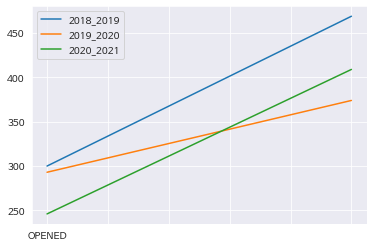

In [105]:
diff_df.plot()

**(3) 그래프를 해석하자면, Index인 opened와 closed가 X축이 되고, Columns가 범례가 됩니다.**

<AxesSubplot:>

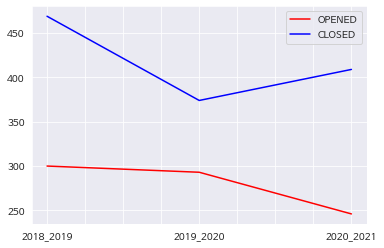

In [106]:
diff_df.T.plot(color=['r','b'])

**(3.1) 그래프를 해석하자면, Columns가 X축이 되고, Index가 범례가 됩니다. 훨씬 시각화가 잘된 것을 알 수 있습니다.**

#### 퀴즈 1. 2020년에 신규 개업한 셀프 주유소의 개수를 구하시오.

In [ ]:
#hint. 조건문을 이용해서 m에서 '셀프'인 데이터만을 출력합니다.

In [24]:
#  2020년에 신규 개업한 셀프 주유소의 개수를 구하여 quiz_1 변수에 저장합니다.
# 숫자형으로 저장합니다.
quiz_1 = None

---

## 3. 브랜드 분석: 상표별 가격경쟁력 및 시장점유율 분석


### 3.1. 주요 상표별 가격 Line Plot 분석

**(1) 주요 상표별 가격을 알아보기 위해 연도, 상표별로 휘발유의 가격 평균을 계산해봅니다.**

In [135]:
year=2018
m.groupby(f'상표_{year}')[f'휘발유_{year}'].mean()

상표_2018
GS칼텍스     1613.219725
NC오일      1582.178571
NH-OIL    1588.411114
S-OIL     1602.447081
SK에너지     1625.920232
알뜰(ex)    1581.561576
알뜰주유소     1580.998449
자가상표      1591.675824
현대오일뱅크    1600.756774
Name: 휘발유_2018, dtype: float64

In [136]:
brand_price_dict=dict()
for year in range(2018,2022):
    brand_price_dict[str(year)]=m.groupby(f'상표_{year}')[f'휘발유_{year}'].mean()

**(1.1) 데이터가 딕셔너리 형태이기 때문에 데이터프레임으로 바꿔줍니다.**

In [141]:
brand_price_df = pd.DataFrame(brand_price_dict)
brand_price_df

,2018,2019,2020,2021
GS칼텍스,1613.219725,1541.010792,1293.482263,1565.812879
NC오일,1582.178571,1499.959184,1256.357143,1542.619048
NH-OIL,1588.411114,1515.996650,1246.254150,1541.557866
S-OIL,1602.447081,1529.870185,1282.028985,1556.360657
SK가스,NaN,1488.000000,NaN,NaN
SK에너지,1625.920232,1548.078729,1293.817042,1565.512630
알뜰(ex),1581.561576,1494.770733,1213.862668,1503.712733
알뜰주유소,1580.998449,1501.828792,1243.560574,1528.261848
자가상표,1591.675824,1520.151211,1267.698413,1541.880952
현대오일뱅크,1600.756774,1528.852620,1284.359599,1559.717130


**(1.2) SK가스에서 NaN이 발견되었기 때문에 brand_price_df에서 SK가스는 제거하도록 하겠습니다.**

In [142]:
brand_price_df = brand_price_df.drop('SK가스')

**(2) 연도, 상표별 가격을 시각화하겠습니다.**

<AxesSubplot:>

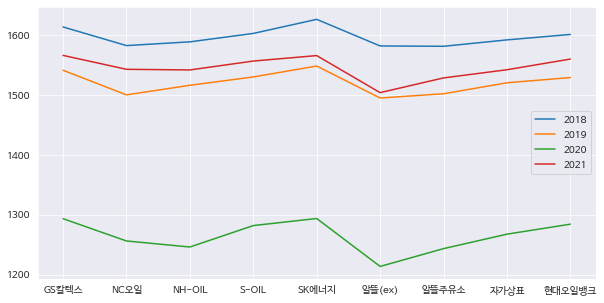

In [143]:
brand_price_df.plot(figsize=(10,5))

**(2.1) 그래프를 해석하자면, 데이터프레임(brand_price_df)의 Index가 그래프의 X축이 되고, Columns가 그래프의 범례가 되는 것을 알 수 있습니다.**

<AxesSubplot:>

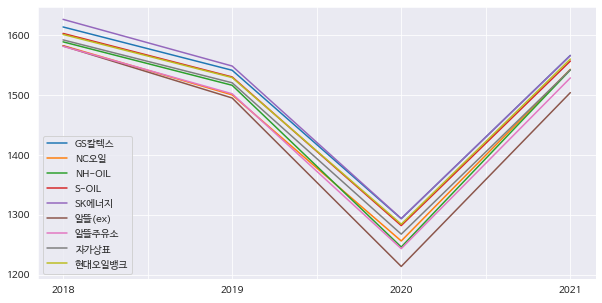

In [144]:
brand_price_df.T.plot(figsize=(10,5))

**(2.2) 그래프를 해석하자면, 데이터프레임(brand_price_df)의 Columns가 그래프의 X축이 되고, Index가 그래프의 범례가 되는 것을 알 수 있습니다.훨씬 시각화가 잘된것을 알 수 있습니다.**

### 3.2. 주요 상표별 지난 4년간 시장 점유율 Stacked Bar Plot 및 Heatmap

**(1) 주요 상표별 점유율을 알아보기 위해 연도, 상표별로 데이터 비중을 구합시다. 
예를 들면, 2018년도의 SK가스의 데이터 수가 100개이면 2018년도의 SK가스의 데이터 비중이 100임을 알 수 있습니다.**

In [145]:
brand_share_dict=dict()
for year in range(2018,2022):
    brand_share_dict[str(year)]=m.groupby(f'상표_{year}').size()

**(1.1) 데이터가 딕셔너리 형태이기 때문에 데이터프레임으로 바꿔줍니다.**

In [146]:
brand_share_df = pd.DataFrame(brand_share_dict)
brand_share_df

,2018,2019,2020,2021
GS칼텍스,2438.0,2396,2343.0,2299.0
NC오일,8.0,7,4.0,3.0
NH-OIL,581.0,597,611.0,632.0
S-OIL,2107.0,2103,2144.0,2131.0
SK가스,NaN,1,NaN,NaN
SK에너지,3503.0,3412,3086.0,3006.0
알뜰(ex),174.0,178,181.0,184.0
알뜰주유소,399.0,388,408.0,419.0
자가상표,208.0,171,153.0,138.0
현대오일뱅크,2218.0,2214,2456.0,2411.0


**(1.2) SK가스에서 NaN이 발견되었기 때문에 brand_price_df에서 SK가스는 제거하도록 하겠습니다.**

In [147]:
brand_share_df = brand_share_df.drop('SK가스')

**(1.3) brand_share_df에 apply 함수를 적용함으로써 연도별 상표의 비중을 퍼센티지로 나타낼 수 있습니다.**

In [148]:
brand_ratio_df = brand_share_df.apply(lambda x:x/brand_share_df.sum(),axis=1)

**(1.4) brand_share_df에 sort_values 함수를 적용함으로써 2018년도 기준으로 데이터를 내림차순 정렬합니다.**

In [149]:
brand_ratio_df = brand_ratio_df.sort_values('2018',ascending=False)

In [150]:
brand_ratio_df

,2018,2019,2020,2021
SK에너지,0.301048,0.297575,0.271035,0.267843
GS칼텍스,0.209522,0.208966,0.205779,0.204847
현대오일뱅크,0.190615,0.193093,0.215703,0.214827
S-OIL,0.181076,0.183412,0.188301,0.189878
NH-OIL,0.049931,0.052067,0.053662,0.056313
알뜰주유소,0.034290,0.033839,0.035833,0.037334
자가상표,0.017876,0.014914,0.013438,0.012296
알뜰(ex),0.014954,0.015524,0.015897,0.016395
NC오일,0.000688,0.000611,0.000351,0.000267


**(2) 연도, 상표별 비중 퍼센티지(시장 점유율)을 시각화하겠습니다.**

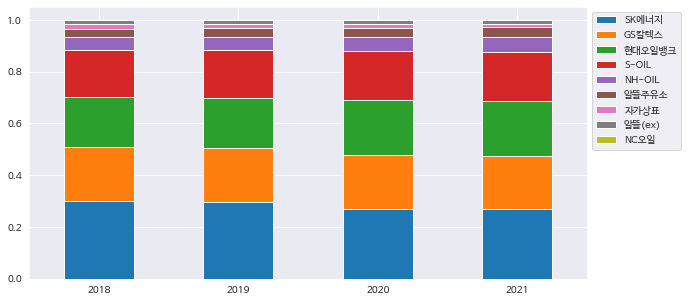

In [162]:
brand_ratio_df.T.plot(kind='bar',stacked=True,rot=0,figsize=(10,5)) #rot:x축의 기울기
plt.legend(bbox_to_anchor=(1, 1))

<AxesSubplot:>

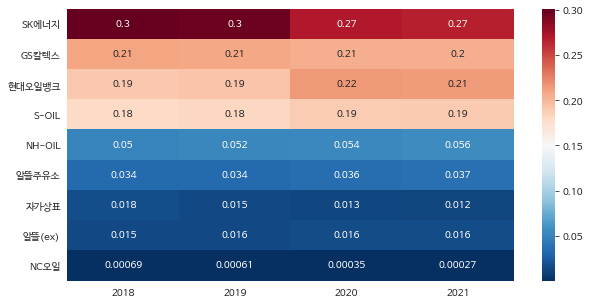

In [166]:
plt.figure(figsize=(10,5))
sns.heatmap(brand_ratio_df, cmap= 'RdBu_r', linewidths=0, linecolor='black',annot=True) #annot: 숫자 표기

#### 퀴즈 2. 2019년 주유소를 셀프 및 일반 주유소로 구분하고 일반 주유소가 차지하는 비율을 구하시오

In [26]:
# 2019년 기준 일반 주유소의 시장 점유율을 quiz_2 변수에 저장합니다.
# 비율은 소숫점 둘째자리 까지 반올림하여 숫자형으로 제출합니다.
quiz_2 = None

---

## 4. **가격 분석:** 주유소 및 지역 별 가격 편차 분석

### 4.1. 가격 분포 Boxplot

<AxesSubplot:xlabel='휘발유_2021'>

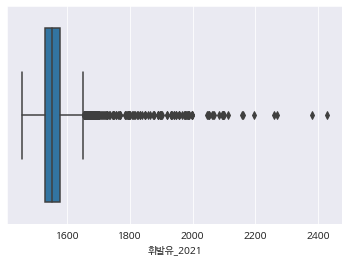

In [153]:
sns.boxplot(x=m['휘발유_2021'])

- Boxplot 설명:
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

### 4.2. 지역별 가격 분포 Boxplot (Multiple Columns)

<AxesSubplot:xlabel='지역1', ylabel='휘발유_2021'>

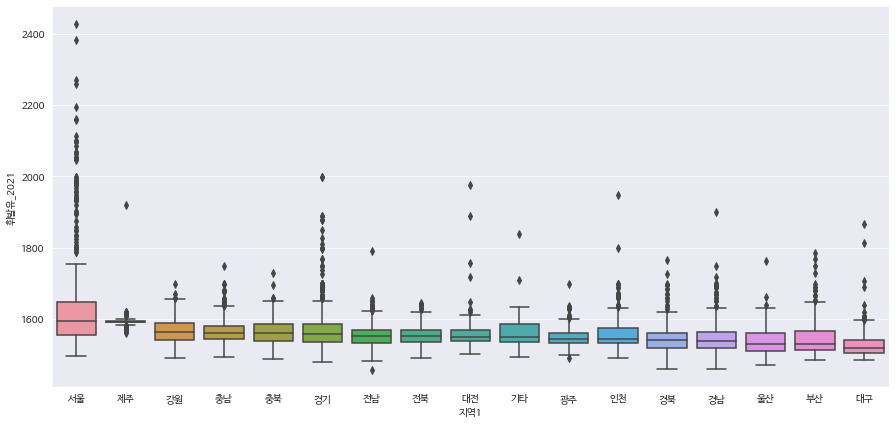

In [171]:
boxplot_order = m.groupby('지역1')['휘발유_2021'].median().sort_values(ascending=False).index
plt.figure(figsize=(15,7))
sns.boxplot(x="지역1", y="휘발유_2021", data=m, orient="v", order=boxplot_order) #orient : 축(가로, 세로)

 ---

## 제출하기

퀴즈 1번과 2번을 수행 후, 아래 코드를 실행하면 `quiz_1 ~ 2` 변수가 저장된 csv 파일을 제작하여 채점을 받을 수 있습니다.

**아래 코드를 수정하면 채점이 불가능 합니다.**

In [27]:
d = {'quiz_1': [quiz_1], 'quiz_2': [quiz_2]}
df_quiz = pd.DataFrame(data=d)
df_quiz.to_csv("submission.csv",index=False)

In [28]:
# 채점을 수행하기 위하여 로그인
import sys
sys.path.append('vendor')
from elice_challenge import check_score, upload

In [30]:
# 제출 파일 업로드
await upload()

이메일 > byumm315@naver.com
비밀번호 > ········
이전에 업로드 된 파일 삭제중...
업로드가 완료되었습니다.


In [31]:
# 채점 수행
await check_score()

Quiz 1: wrong

Quiz 2: wrong


Total score: 0 points

점수는 0 점 입니다.


---

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>